<a href="https://colab.research.google.com/github/li199959/one/blob/main/%E5%8A%A0%E8%BD%BD%E6%95%B0%E6%8D%AE%E9%9B%86.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import numpy as np
# 两个帮助加载数据的工具类
from torch.utils.data import Dataset # 构造数据集，支持索引
from torch.utils.data import DataLoader # 拿出一个mini-batch的一组数据以供训练
import matplotlib.pyplot as plt


In [2]:
class DiabetesDataset(Dataset):
	# init()魔法方法：文件小，读取所有的数据，直接加载到内存里
	# 如果文件很大，初始化之后，定义文件列表，再用getitem()读出来
	def __init__(self, filepath):
		# filepath：文件路径
		xy = np.loadtxt(filepath, delimiter=',', dtype=np.float32)
		self.len = xy.shape[0]  # xy.shape = (n, 9) 0表示知道多少行，即数据集长度
		self.x_data = torch.from_numpy(xy[:, :-1]) # 所有行，前八列
		self.y_data = torch.from_numpy(xy[:, [-1]]) # 所有行，最后一列

	# getitem()魔法方法：实例化类之后，该对象把对应下标的数据拿出来
	def __getitem__(self, index):
		return self.x_data[index], self.y_data[index] # 返回的是元组

	# len()魔法方法：使用对象时，可以对数据条数进行返回
	def __len__(self):
		return self.len # 759

In [13]:
dataset = DiabetesDataset('diabetes.csv.gz')
train_loader = DataLoader(dataset=dataset,batch_size=32,shuffle=True,num_workers=2)

class Model(torch.nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.linear1 = torch.nn.Linear(8, 6)
        self.linear2 = torch.nn.Linear(6, 4)
        self.linear3 = torch.nn.Linear(4, 1)
        self.sigmoid = torch.nn.Sigmoid()

    def forward(self, x):
        x = self.sigmoid(self.linear1(x))
        x = self.sigmoid(self.linear2(x))
        x = self.sigmoid(self.linear3(x))
        return x

model = Model()

criterion = torch.nn.BCELoss(size_average=True)

optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

if __name__ =='__main__':
    loss_list = []
    for epoch in range(100):
        #enumerate:可获得当前迭代的次数
        for i,data in enumerate(train_loader,0):
            #准备数据dataloader会将按batch_size返回的数据整合成矩阵加载
            inputs, labels = data
            #前馈
            y_pred = model(inputs)
            loss = criterion(y_pred, labels)
            print(epoch, i, loss.item())
            #反向传播
            optimizer.zero_grad()
            loss.backward()
            #更新
            optimizer.step()
        loss_list.append(loss.item())



0 0 0.6813151836395264
0 1 0.6742180585861206
0 2 0.6728817224502563
0 3 0.6640720963478088
0 4 0.6391190886497498
0 5 0.6858993172645569
0 6 0.6523864269256592
0 7 0.6861742734909058
0 8 0.6131066679954529
0 9 0.6538779139518738
0 10 0.6761892437934875
0 11 0.6643267273902893
0 12 0.6641949415206909
0 13 0.639790952205658
0 14 0.701301097869873
0 15 0.6391240358352661
0 16 0.6757014989852905
0 17 0.6245065927505493
0 18 0.6763279438018799
0 19 0.6494922637939453
0 20 0.6486610174179077
0 21 0.6912360787391663
0 22 0.6623696684837341
0 23 0.5912967920303345
1 0 0.6469970941543579
1 1 0.7244731187820435
1 2 0.6474431753158569
1 3 0.6775302290916443
1 4 0.6474421620368958
1 5 0.6923136711120605
1 6 0.588681161403656
1 7 0.5986936688423157
1 8 0.5944185256958008
1 9 0.573418140411377
1 10 0.624747633934021
1 11 0.6631664037704468
1 12 0.6821384429931641
1 13 0.6443461179733276
1 14 0.700163722038269
1 15 0.7888181209564209
1 16 0.613385796546936
1 17 0.7299650311470032
1 18 0.645888149738

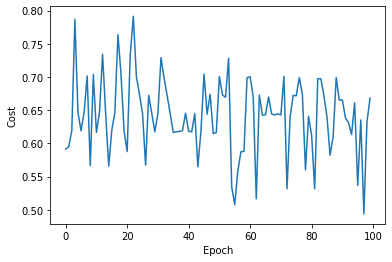

In [14]:
plt.plot(range(100), loss_list)
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.show()